<a href="https://colab.research.google.com/github/C3578/Fed_bud_Russia_Analytics/blob/master/Fed_bud_Russia_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

По ссылке 
https://www.minfin.ru/ru/statistics/fedbud/
скачиваем датасет с ежемесячной информацией об исполнении федерального бюджета Российской Федерации 
(данные с 1 января 2011 г.)

Давайте исследуем датасет, и узнаем от каких параметров в большей степени зависит расходы на образование, а также попробуем предсказать расходы на образование в будущем.

In [ ]:
# Подключаем google drive.
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
data_root = '...'
print(os.listdir(data_root))      #  Посмотрим содержимое data_root.

['fedbud_month.xlsx', 'fedbud.xlsx', 'fedbud_Введение Python + Data Sciencet.ipynb']


In [ ]:
df = pd.read_excel(data_root +'fedbud.xlsx',index_col='РАЗДЕЛ I', na_values='?', encoding = 'utf8')

In [ ]:
df.head()

,Unnamed: 0,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00,2012-12-01 00:00:00,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,...,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,май.20**
РАЗДЕЛ I,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Доходы, всего",1,804.858264,1505.608535,2392.782446,3339.693632,4200.038231,5306.370216,6233.830072,7220.201346,8213.020024,9240.763213,10164.760609,11367.652623,1059.559186,1865.966005,2966.312912,4058.679969,5083.326697,6200.399470,7245.938154,8352.074068,9385.360675,10453.225370,11404.844846,12855.540621,1093.098625,1981.299781,3105.607447,4224.408364,5115.547400,6257.653734,7330.012277,8418.161569,9604.469962,10740.597345,11758.713036,13019.939485,1326.688721,2368.552108,3521.419857,...,2290.888407,3633.280646,4763.721369,5830.547212,7122.020500,8371.167486,9607.912220,10971.469948,12283.600195,13418.735103,15088.914843,1304.478850,2534.747230,4076.325809,5528.995029,6914.865085,8626.742100,10496.158153,12222.398775,13986.148208,15802.349295,17454.914403,19454.369032,1486.338090,2843.971233,4590.018230,6361.144595,7867.426008,9549.863609,11471.322070,13256.739355,15034.722299,16671.168008,18025.630359,20188.796809,1556.549421,2818.890172,4731.336390,7001.993172,7890.899182
Нефтегазовые доходы,1.1.,355.598723,692.338578,1134.136196,1580.550506,2067.031151,2540.385273,3019.822999,3508.977952,3989.915585,4535.285702,5058.767060,5641.769451,530.215653,1015.766213,1544.855355,2104.810818,2688.081465,3226.109522,3734.466943,4224.973335,4739.651410,5276.180080,5842.467359,6453.184234,465.863552,976.712990,1503.668913,2087.616922,2611.325359,3099.109526,3635.732884,4180.566603,4774.166609,5359.608563,5940.734165,6534.035804,615.041101,1233.784015,1826.673254,...,1014.901831,1517.865209,1974.173374,2440.003145,2888.569750,3304.565900,3753.928836,4246.200000,4764.875677,5334.772440,5971.901701,661.344787,1289.557591,1859.652786,2490.324930,3174.869901,3935.044895,4684.264480,5501.805936,6302.082644,7222.058104,8181.641765,9017.774488,680.759261,1367.356828,1993.400350,2722.599739,3420.342605,4121.901460,4782.934582,5407.510489,6008.032905,6676.723940,7265.408393,7924.250828,615.942788,1224.268921,1787.931596,2222.492302,2436.727285
Ненефтегазовые доходы,1.2.,449.259542,813.269957,1258.646250,1759.143126,2133.007080,2765.984943,3214.007073,3711.223394,4223.104439,4705.477511,5105.993549,5725.883172,529.343533,850.199792,1421.457557,1953.869150,2395.245232,2974.289948,3511.471211,4127.100733,4645.709264,5177.045290,5562.377487,6402.356388,627.235073,1004.586791,1601.938534,2136.791442,2504.2

In [ ]:
# Удалим ненужный столбец.
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df = df.T     # Транспонируем таблицу

In [ ]:
df.head()

РАЗДЕЛ I,"Доходы, всего",Нефтегазовые доходы,Ненефтегазовые доходы,Связанные с внутренним производством,НДС (внутренний),Акцизы,Налог на прибыль,Связанные с импортом,НДС на ввозимые товары,Акцизы на ввозимые товары,Ввозные пошлины,Прочие,РАЗДЕЛ II,"Расходы, всего",Общегосударственные вопросы,Национальная оборона,Национальная безопасность и правоохранительная деятельность,Национальная экономика,Жилищно-коммунальное хозяйство,Охрана окружающей среды,Образование,"Культура, кинематография",Здравоохранение,Социальная политика,Физическая культура и спорт,Средства массовой информации,Обслуживание государственного и муниципального долга,Межбюджетные трансферты общего характера бюджетам бюджетной системы Российской Федерации,РАЗДЕЛ III,Дефицит (-)/Профицит (+),Ненефтегазовый дефицит,РАЗДЕЛ IV,Источники финансирования дефицита федерального бюджета - всего,Источники внутреннего финансирования дефицита,Источники внутреннего финансирования дефицита \n(без учета изменения остатков на счетах),Сальдо внутреннего долга*:,привлечение,погашение государственного внутреннего долга,Бюджетные кредиты:,предоставление,возврат,"Поступления от продажи акций и земельных участков, находящихся в государственной собственности",Курсовая разница,Изменение остатков на счетах,Прочее,Источники внешнего финансирования дефицита,Привлечение кредитов и размещение ценных бумаг,Погашение внешнего долга,Другие источники внешнего финансирования
2011-01-01 00:00:00,804.858264,355.598723,449.259542,212.022100,182.545071,21.316135,8.160894,100.828688,67.413350,1.705891,31.709447,136.408754,NaN,657.372820,24.387951,23.156493,72.749239,39.444211,15.926638,0.207511,10.149421,1.503469,11.103267,370.746747,11.956830,9.143178,25.460674,41.437189,NaN,147.485444,-208.113278,NaN,-147.485444,-148.005999,253.593330,-3.866213,37.186640,-41.052853,0.259922,0.000000,0.259922,7.775269,-26.280754,-401.599330,275.705106,0.520555,0.076635,-2.231911,2.675831
2011-02-01 00:00:00,1505.608535,692.338578,813.269957,329.036686,282.240275,31.066117,15.730294,250.878373,166.087842,4.555241,80.235291,233.354898,NaN,1427.125081,59.287760,186.869579,155.074155,119.158982,22.441423,1.628362,44.211646,6.417024,72.925849,597.637324,12.682136,11.032325,49.882478,87.876039,NaN,78.483454,-613.855124,NaN,-78.483454,-78.035079,419.683843,144.077823,200.372286,-56.294463,-16.664852,-17.000000,0.335148,103.733363,-83.759766,-497.718922,272.297275,-0.448375,0.250365,-3.560325,2.861585
2011-03-01 00:00:00,2392.782446,1134.136196,1258.646250,544.986429,431.112109,46.731481,67.142839,443.174131,293.195820,8.662584,141.315727,270.485690,NaN,2214.743396,123.774410,263.820070,248.168354,248.485495,60.171546,2.950899,84.213745,11.515824,103.854809,822.045577,13.566345,13.538837,82.924560,135.712926,NaN,178.039050,-956.097146,NaN,-178.039050,-157.172476,496.328233,284.519190,340.813653,-56.294463,-38.386144,-38.900000,0.513856,106.890976,-114.349614,-653.500710,257.653825,-20.866573,0.333746,-26.921603,5.721284
2011-04-01 00:00:00,3339.693632,1580.550506,1759.143126,775.129736,604.120184,65.081499,105.928052,625.309915,414.346540,12.558718,198.404657,358.703475,NaN,3176.607425,178.234113,437.458888,333.831803,428.735358,75.721569,4.195495,126.575456,19.847048,130.363609,1069.522242,14.864153,19.306451,91.756221,246.195018,NaN,163.086207,-1417.464299,NaN,-163.086207,-140.367195,539.903410,355.620641,411.915103,-56.294463,-58.745145,-60.704300,1.959155,113.252491,-130.345577,-680.270605,260.121001,-22.719012,0.506116,-28.810337,5.585210
2011-05-01 00:00:00,4200.038231,2067.031151,2133.007080,925.890801,706.949460,84.782739,134.158602,808.819019,540.331109,16.644477,251.843433,398.297260,NaN,3814.773481,223.716104,537.258340,414.693915,514.585876,91.934917,5.321937,162.472018,23.688365,154.475094,1260.406275,16.374343,26.236753,98.797567,284.811978,NaN,385.264750,-1681.766401,NaN,-385.264750,-331.890485,659.647307,473.240754,573.623181,-100.382426,-67.550643,-71.739297,4.188653,113.684228,-126.567591,-991.537792,266.840560

In [ ]:
# Удалим пустые столбцы.
df = df.drop(['РАЗДЕЛ II', 'РАЗДЕЛ III', 'РАЗДЕЛ IV'], axis=1)

In [ ]:
df.shape

(113, 46)

In [ ]:
df.describe()

РАЗДЕЛ I,"Доходы, всего",Нефтегазовые доходы,Ненефтегазовые доходы,Связанные с внутренним производством,НДС (внутренний),Акцизы,Налог на прибыль,Связанные с импортом,НДС на ввозимые товары,Акцизы на ввозимые товары,Ввозные пошлины,Прочие,"Расходы, всего",Общегосударственные вопросы,Национальная оборона,Национальная безопасность и правоохранительная деятельность,Национальная экономика,Жилищно-коммунальное хозяйство,Охрана окружающей среды,Образование,"Культура, кинематография",Здравоохранение,Социальная политика,Физическая культура и спорт,Средства массовой информации,Обслуживание государственного и муниципального долга,Межбюджетные трансферты общего характера бюджетам бюджетной системы Российской Федерации,Дефицит (-)/Профицит (+),Ненефтегазовый дефицит,Источники финансирования дефицита федерального бюджета - всего,Источники внутреннего финансирования дефицита,Источники внутреннего финансирования дефицита \n(без учета изменения остатков на счетах),Сальдо внутреннего долга*:,привлечение,погашение государственного внутреннего долга,Бюджетные кредиты:,предоставление,возврат,"Поступления от продажи акций и земельных участков, находящихся в государственной собственности",Курсовая разница,Изменение остатков на счетах,Прочее,Источники внешнего финансирования дефицита,Привлечение кредитов и размещение ценных бумаг,Погашение внешнего долга,Другие источники внешнего финансирования
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,112.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,112.000000,112.000000,112.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,87.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,110.000000,113.000000,113.000000
mean,7595.947694,3410.658190,4185.289504,2030.476719,1398.228227,314.654999,317.593498,1339.437877,979.112528,32.717281,327.608093,815.374908,7337.820649,486.182004,1325.111838,880.142544,896.715144,72.956855,40.983129,345.129910,43.521734,266.939263,2240.003914,27.774578,38.440930,282.745847,392.873314,262.358537,-3152.961156,-262.358537,-240.719934,899.525376,332.632208,640.910537,-308.278613,-29.117862,-97.524846,45.968037,32.446413,128.384145,-1140.245311,443.773543,-14.393534,107.341824,-102.748745,-16.052744
std,4591.438299,2054.638958,2628.035257,1346.250774,877.622840,223.599262,260.422060,828.827629,622.605528,22.112988,197.436908,518.889590,4290.921203,309.043906,762.524067,550.384100,663.243284,57.599709,40.129115,186.998916,26.698308,159.603850,1238.083087,20.439839,24.416217,188.152351,225.863314,1141.003234,1853.627093,1141.003234,1187.039063,709.221971,395.649731,486.373719,196.144332,60.079563,96.480126,59.411807,69.669931,753.430312,1439.448288,538.037284,131.360792,134.336745,99.347039,37.769357
min,804.858264,355.598723,449.259542,212.022100,169.117772,21.316135,8.160894,100.828688,67.413350,1.705891,29.630067,50.458276,657.372820,24.387951,12.648124,72.749239,14.576308,0.005100,0.125430,10.149421,1.138257,11.103267,252.356959,0.183975,0.030342,23.495906,41.437189,-2956.406149,-7823.660751,-3442.688701,-3542.232766,-683.707238,-179.407152,3.408360,-820.751820,-196.928322,-355.000000,0.000000,0.050000,-1344.995690,-4591.641234,-2285.581644,-305.985640,0.000000,-388.456267,-147.203297
25%,3910.109693,1682.884406,2115.415437,925.890801,706.949460,142.528067,112.241147,660.818104,471.369306,14.806184,155.594215,382.985828,3883.707343,223.716104,797.700000,410.765135,361.054897,32.848733,11.582865,172.000000,21.822634,142.900000,1183.678805,11.861576,17.363321,133.604700,212.180672,-349.598736,-4353.635737,-720.062512,-748.177938,420.679870,30.701773,235.526463,-459.918805,-58.745145,-142.515473,7.110400,3.349600,-258.814606,-1822.991610,260.121001,-95.881071,0.620865,-155.222219,-40.276636
50%,7122.020500,3174.869901,3760.511477,1825.528922,130

In [ ]:
# Определим числовые и категориальные признаки
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']
print(categorical_columns)
print()
print(numerical_columns)

[]

['Доходы, всего', 'Нефтегазовые доходы', 'Ненефтегазовые доходы', 'Связанные с внутренним производством', 'НДС (внутренний)', 'Акцизы', 'Налог на прибыль', 'Связанные с импортом', 'НДС на ввозимые товары', 'Акцизы на ввозимые товары', 'Ввозные пошлины', 'Прочие', 'Расходы, всего', 'Общегосударственные вопросы', 'Национальная оборона', 'Национальная безопасность и правоохранительная деятельность', 'Национальная экономика', 'Жилищно-коммунальное хозяйство', 'Охрана окружающей среды', 'Образование', 'Культура, кинематография', 'Здравоохранение', 'Социальная политика', 'Физическая культура и спорт', 'Средства массовой информации', 'Обслуживание государственного и муниципального долга', 'Межбюджетные трансферты общего характера бюджетам бюджетной системы Российской Федерации', 'Дефицит (-)/Профицит (+)', 'Ненефтегазовый дефицит', 'Источники финансирования дефицита федерального бюджета - всего', 'Источники внутреннего финансирования дефицита', 'Источники внутреннего финансирования дефици

In [ ]:
# Категориальные признаки отсутствуют.

In [ ]:
# Минимальное количество присутствующих в столбце значений
min(df.count(axis=0))

87

In [ ]:
df.count(axis=0).max()

113

In [ ]:
# Заполним пропуски медианными значениями по столбцу.
df = df.fillna(df.median(axis=0), axis=0)

In [ ]:
df.count(axis=0).min()

113

In [ ]:
import matplotlib.pyplot as plt

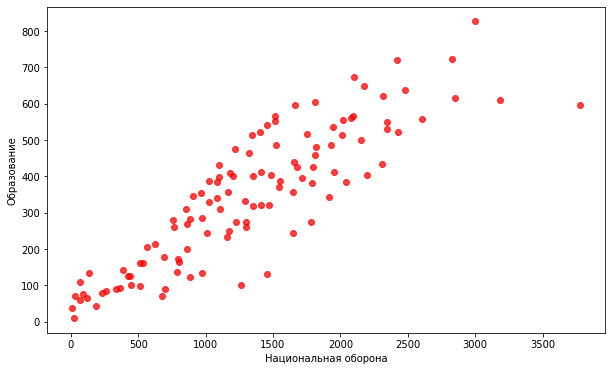

In [ ]:
# Построим диаграмму рассеяния по двум столбцам.
col1 = 'Национальная оборона'
col2 = 'Образование'
data = df

plt.figure(figsize=(10, 6))
plt.scatter(data[col1], data[col2],alpha=0.75, color='red')
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()

In [ ]:
#  Для наглядности, построим корреляционную матрицу по выборочным столбцам таблицы.
data = df[['Доходы, всего', 'Национальная оборона', 'Образование', 'Охрана окружающей среды', 'Культура, кинематография', 'Здравоохранение', 'Социальная политика', 'Физическая культура и спорт']]
pearsoncorr = data.corr(method='pearson')

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


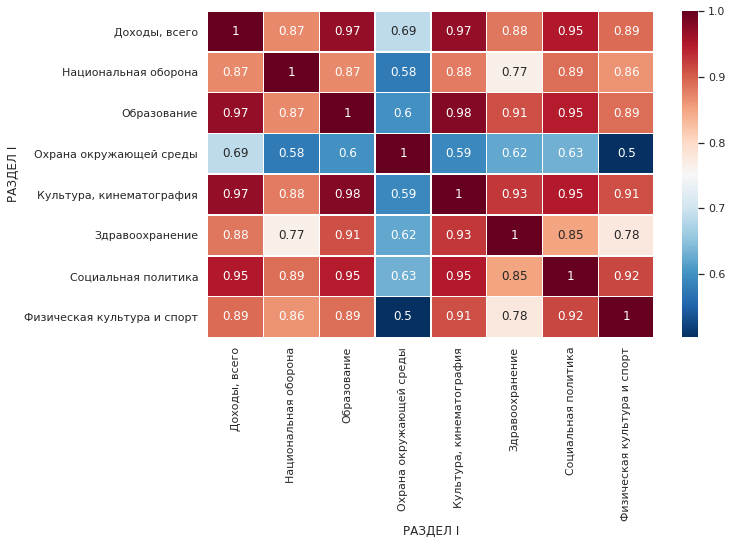

In [ ]:
# Построим тепловую карту корреляционной матрицы.
sns.set(rc={'figure.figsize':(10, 6)})
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
data = df[['Доходы, всего', 'Национальная оборона', 'Образование']]

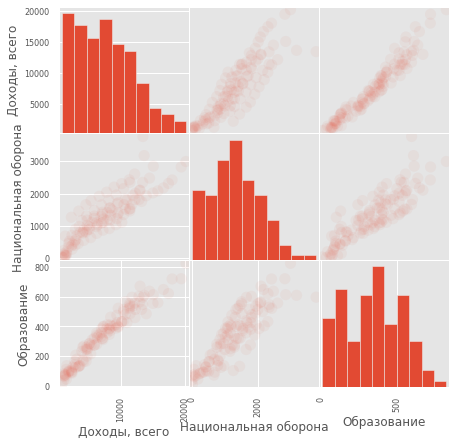

In [ ]:
# Функция scatter_matrix  построит для каждой количественной переменной гистограмму.
# Для каждой пары таких переменных – диаграмму рассеяния.

plt.style.use('ggplot')
scatter_matrix(data, alpha=0.05, figsize=(7, 7), s=500)
plt.show()

In [ ]:
# Построим корреляционную матрицу по всей таблице.
df_corr = df.corr()

In [ ]:
# Зависимость(коэффициент корреляции) столбца "Образование" от других атрибутов.
df_corr['Образование'].abs().sort_values(ascending=False)[:15]

РАЗДЕЛ I
Образование                                                                                 1.000000
Культура, кинематография                                                                    0.980325
Связанные с импортом                                                                        0.974801
Доходы, всего                                                                               0.969356
Национальная безопасность и правоохранительная деятельность                                 0.967045
Расходы, всего                                                                              0.966470
Средства массовой информации                                                                0.963211
НДС на ввозимые товары                                                                      0.962965
Нефтегазовые доходы                                                                         0.957952
Общегосударственные вопросы                                                       

### Обучим модель предсказывать значения расходов на образование, основываясь на данных по другим статьям расходов/доходов за месяц.



In [ ]:
X = df.drop(['Образование'], axis=1).copy(deep=True)      # Это примеры, на которыx под мы будем обучать модель.

In [ ]:
X = X.reset_index(drop=True)      #  Сбросим индексы.

In [ ]:
X.shape

(113, 45)

In [ ]:
x_test = X[112:]      #  Эти данные мы подадим в уже обученную модель, чтобы предсказать целевое значение.

In [ ]:
X.drop([112], inplace = True)      #  Удалим из тренировочных данных строку с предсказываемым значением.

In [ ]:
Y = df['Образование'].copy(deep=True)      # Это ответы к примерам, на которых обучается модель.

In [ ]:
Y = Y.reset_index(drop=True)      #  Сбросим индексы.

In [ ]:
Y.shape

(113,)

In [ ]:
y_test = Y[112]      #  Фактическое значение, которое мы предсказываем.

In [ ]:
y_test

411.80028361755006

In [ ]:
Y.drop([112], inplace = True)      #  Удалим из тренировочных данных предсказываемое значение.

In [ ]:
print(X.shape, Y.shape)

(112, 45) (112,)


In [ ]:
from sklearn.linear_model import LinearRegression      #  Импортируем модель.

In [ ]:
reg = LinearRegression().fit(X, Y)      #  Обучаем модель.

In [ ]:
print('Предсказываемое значение:', reg.predict(x_test).item())
print('    Фактическое значение:', y_test)

Предсказываемое значение: 411.8012442578329
    Фактическое значение: 411.80028361755006
